<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/main/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [26]:
# 1. to handle the data
import pandas as pd
import numpy as np
import os


# from imblearn.combine import SMOTEENN


# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import plotly.express as px
import shap


# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.impute import SimpleImputer, KNNImputer

# 4. import pipeline and feature selection
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFromModel
# from sklearn.decomposition import PCA, TruncatedSVD



# 5. Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier


# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,recall_score , f1_score, roc_auc_score


# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

# 9. For saving the model
import joblib


# Load the Dataset



In [27]:
df = pd.read_csv('/content/heart_failure_clinical_raw_data.csv')

In [28]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
156,52.0,1,58,0,35,0,277000.0,1.4,136,0,0,120,0
65,60.0,0,68,0,20,0,119000.0,2.9,127,1,1,64,1
245,61.0,1,80,1,38,0,282000.0,1.4,137,1,0,213,0
195,77.0,1,418,0,45,0,223000.0,1.8,145,1,0,180,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
103,42.0,0,5209,0,30,0,226000.0,1.0,140,1,1,87,0
223,47.0,0,582,0,25,0,130000.0,0.8,134,1,0,201,0
238,65.0,1,720,1,40,0,257000.0,1.0,136,0,0,210,0
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
177,49.0,1,69,0,50,0,132000.0,1.0,140,0,0,147,0


# Exploratory Data Analysis (EDA)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [30]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
new_column_names = {
    'age': 'Age',
    'anaemia': 'Anaemia',
    'creatinine_phosphokinase': 'CreatininePhosphokinase',
    'diabetes': 'Diabetes',
    'ejection_fraction': 'EjectionFraction',
    'high_blood_pressure': 'HighBloodPressure',
    'platelets': 'PlateletCount',
    'serum_creatinine': 'SerumCreatinine',
    'serum_sodium': 'SerumSodium',
    'sex': 'Sex',
    'smoking': 'SmokingStatus',
    'time': 'FollowupDays',
    'DEATH_EVENT': 'DeathEvent'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)


In [32]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [33]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
CreatininePhosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
EjectionFraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
HighBloodPressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
PlateletCount,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
SerumCreatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
SerumSodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [34]:
df.shape

(299, 13)

In [35]:
df.isnull().sum()

,0
Age,0
Anaemia,0
CreatininePhosphokinase,0
Diabetes,0
EjectionFraction,0
HighBloodPressure,0
PlateletCount,0
SerumCreatinine,0
SerumSodium,0
Sex,0


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Anaemia'}>,
        <Axes: title={'center': 'CreatininePhosphokinase'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'EjectionFraction'}>,
        <Axes: title={'center': 'HighBloodPressure'}>,
        <Axes: title={'center': 'PlateletCount'}>,
        <Axes: title={'center': 'SerumCreatinine'}>],
       [<Axes: title={'center': 'SerumSodium'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'SmokingStatus'}>,
        <Axes: title={'center': 'FollowupDays'}>],
       [<Axes: title={'center': 'DeathEvent'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

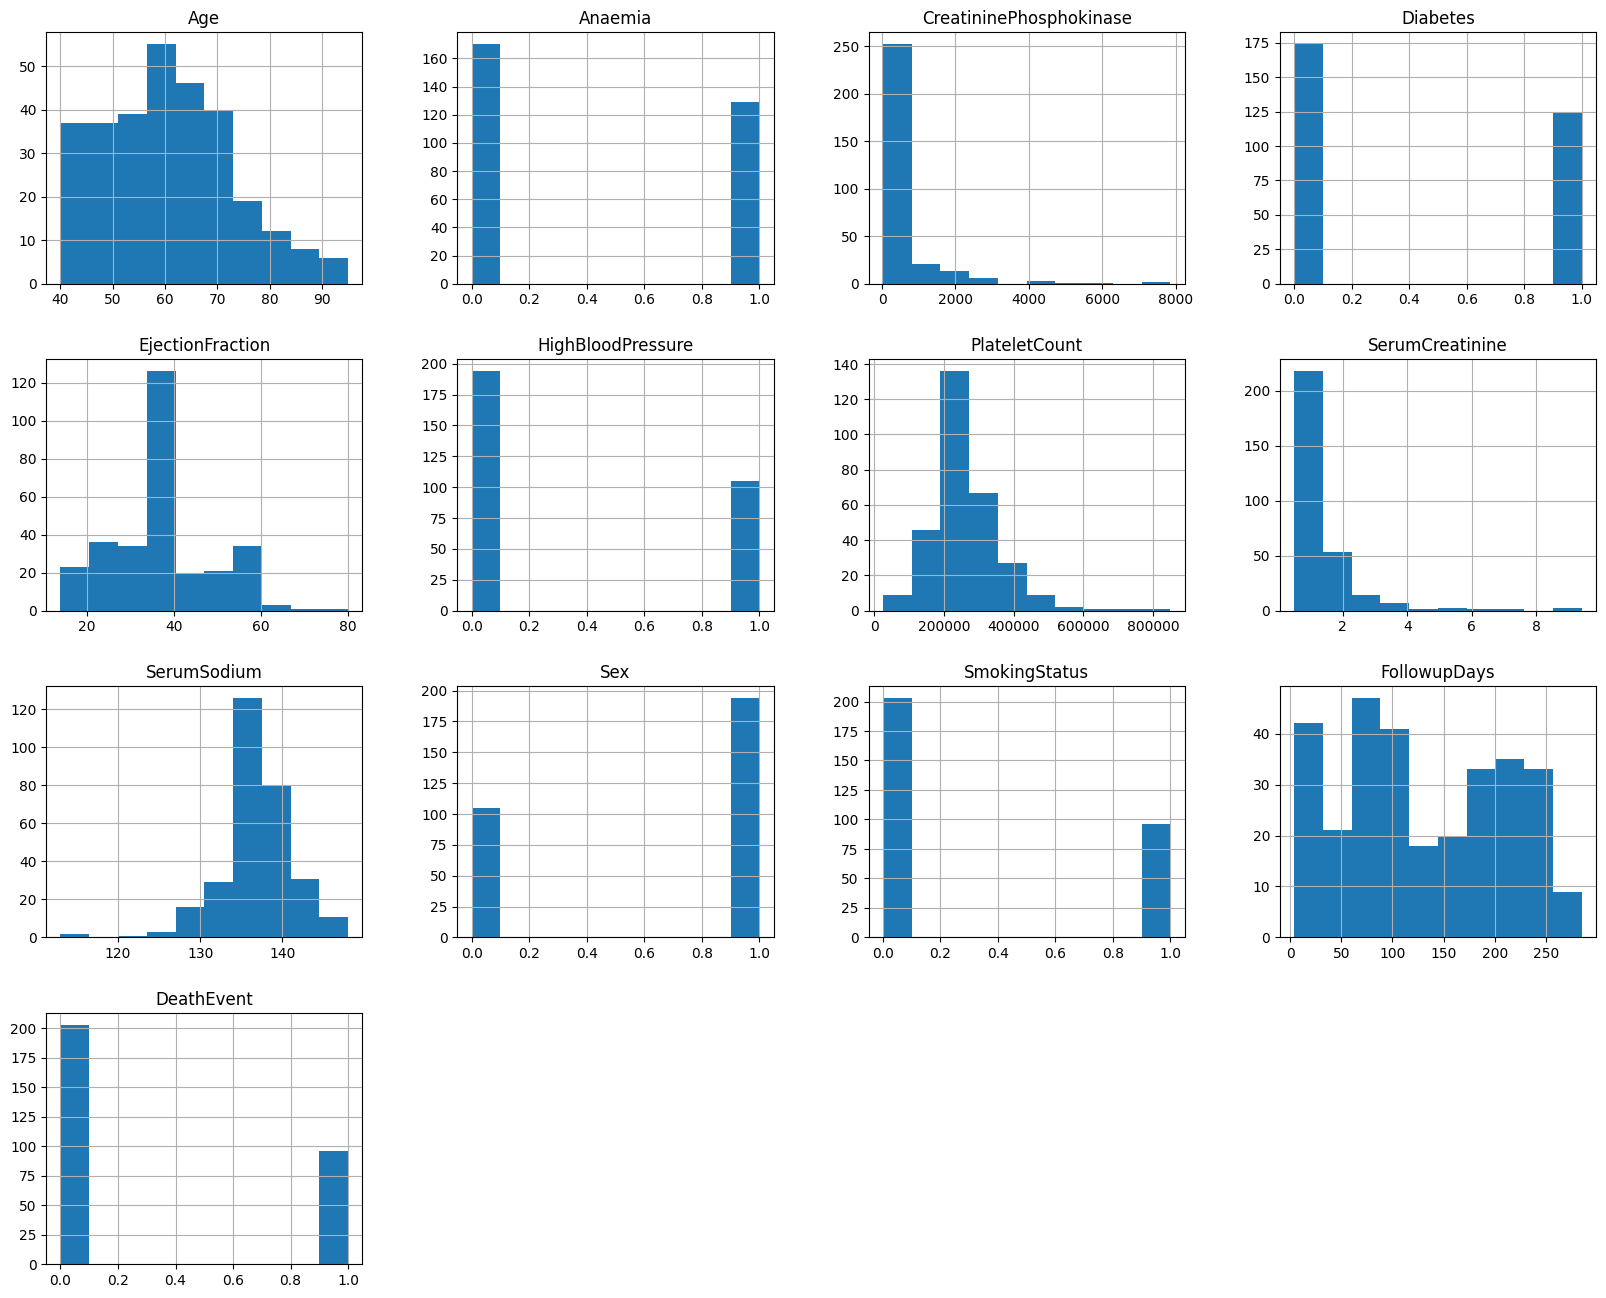

In [38]:
df.hist(figsize=(20, 16))

In [39]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [40]:
pd.crosstab(index=df.DeathEvent, columns=df.Sex)

Sex,0,1
DeathEvent,,
0,71,132
1,34,62


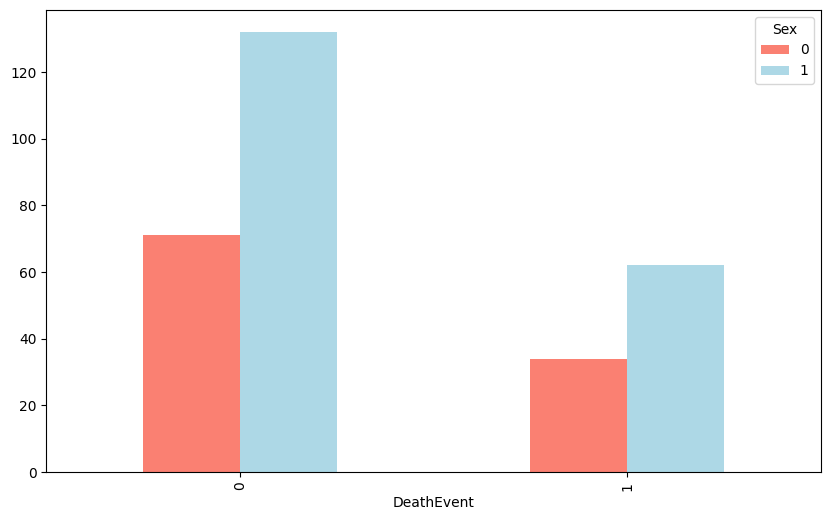

In [41]:
pd.crosstab(df.DeathEvent, df.Sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

 ### What can we infer from this?

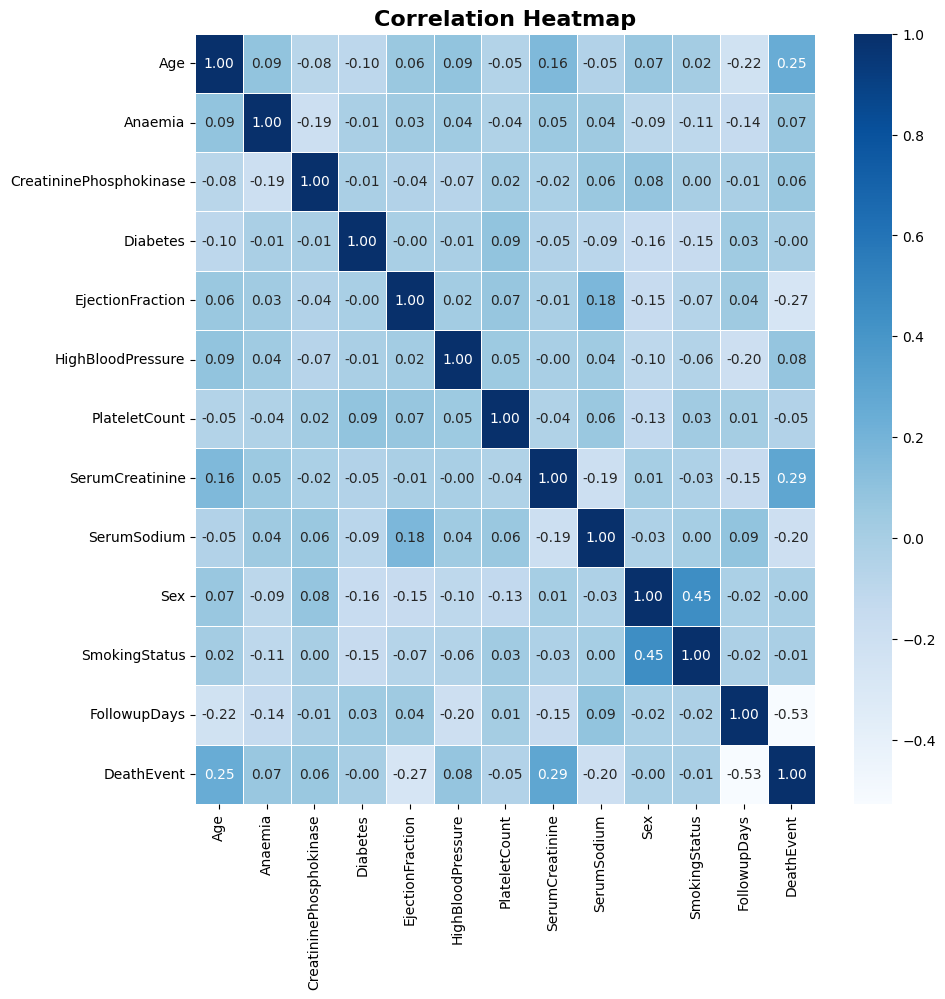

In [42]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,  annot=True, cmap='Blues', fmt='.2f', linewidths=0.5 )
plt.title('Correlation Heatmap', fontsize=16 , fontweight='bold')
plt.show()

# Imbalanced

In [43]:
df['DeathEvent'].value_counts()

,count
DeathEvent,
0,203
1,96


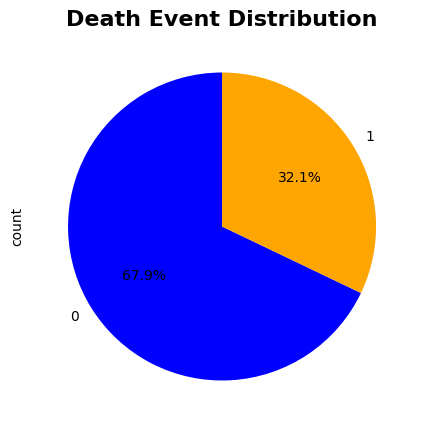

In [44]:
df['DeathEvent'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 5), colors=['blue', 'orange'])
plt.title('Death Event Distribution', fontsize=16, fontweight='bold')

plt.show()

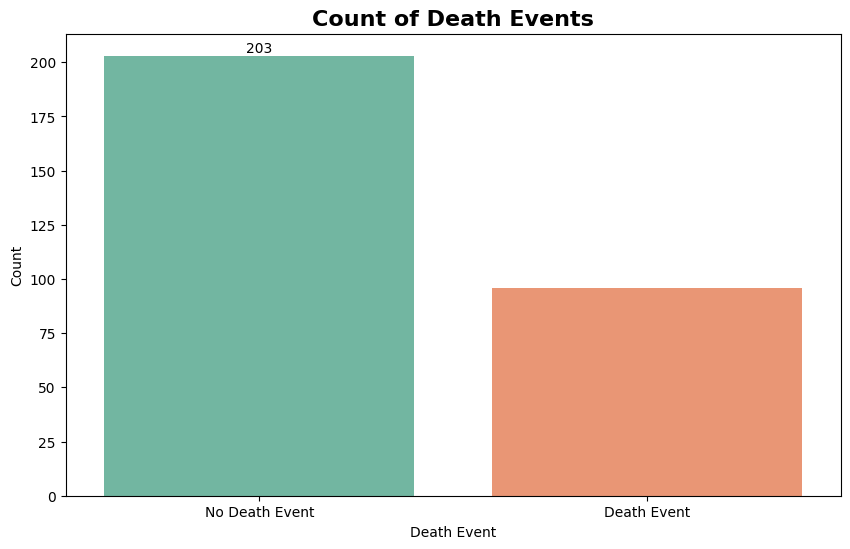

In [45]:
plt.figure(figsize=(10, 6))
ax =sns.countplot(x='DeathEvent', data=df, palette='Set2')
plt.title('Count of Death Events', fontsize=16, fontweight='bold')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
plt.show()

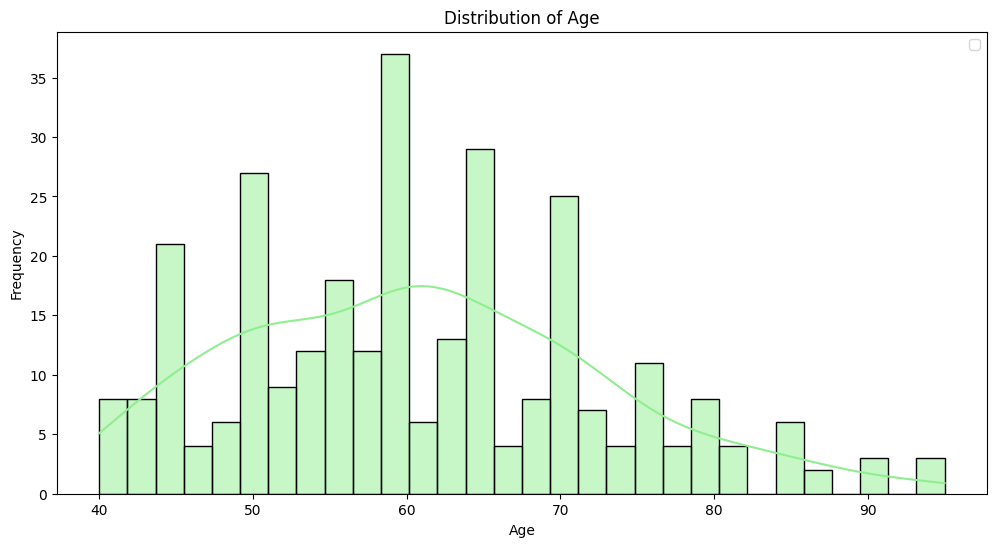

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

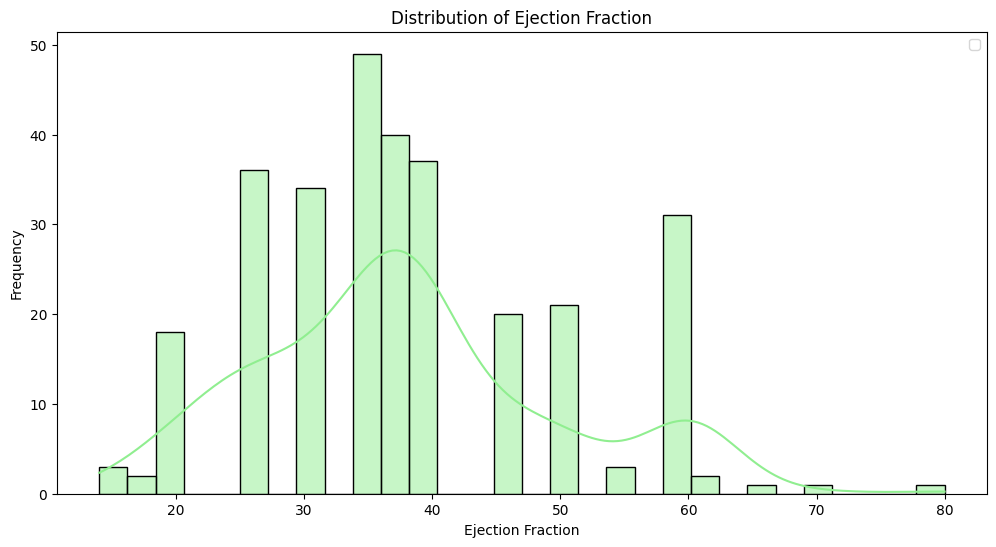

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df['EjectionFraction'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [48]:
fig=px.histogram(df,
                 x="DeathEvent",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group",
                 )

fig.show()

In [49]:
fig = px.box(df,y="Age",x="DeathEvent",title=f"Distrubution of Age")

fig.show()

In [50]:
x  = df.drop(columns=['DeathEvent'])
y = df['DeathEvent']

In [51]:
y.value_counts()

,count
DeathEvent,
0,203
1,96


# Splitting the data into training and testing sets


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x , y,  stratify=y , random_state=42)

In [53]:
y_train.value_counts()

,count
DeathEvent,
0,152
1,72


In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((224, 12), (75, 12), (224,), (75,))

# Modeling

In [55]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False
    )
}

In [56]:
parameters = {
    'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 7),
        'clf__class_weight': ['balanced'],
        'clf__penalty': ['l2', 'l1'],
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'DecisionTreeClassifier': {
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced'],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [10, 20, 50, 100],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced', 'balanced_subsample'],

    },
       'XGBClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__max_depth': [3, 5, 7],
        'clf__subsample': [0.8, 1.0],
        'clf__scale_pos_weight': [1, 2, 3]
    }

}

In [57]:
y_train.value_counts()

,count
DeathEvent,
0,152
1,72


## Note
### How it works:
n_jobs=1 → use only 1 CPU core (no parallelism — slowest).

n_jobs=4 → use exactly 4 CPU cores (parallel but limited).

n_jobs=-1 → use all CPU cores your machine has (fastest).



# Train

In [58]:
results = []

for name, model in models.items():

    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    param_grid = parameters.get(name, {})

    # Grid search
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_  # store the fitted model
    })

# Sort by score (descending)
results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)

top_5 = results_sorted[:5]



Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........
Training XGBClassifier........


# print leaderboard

In [59]:
print("\nLeaderboard:")

best_model = None
best_accuracy = -1
best_entry = None

for r in results_sorted:

    print(f"{r['name']}: {r['best_score']:.4f}, Params: {r['best_params']}")

    if r['best_score'] > best_accuracy:
        best_accuracy = r['best_score']
        best_model = r['model']
        best_entry = r

print("\nBest Model:")
print(f"Name: {best_entry['name']}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Params: {best_entry['best_params']}")



Leaderboard:
RandomForestClassifier: 0.8663, Params: {'clf__class_weight': None, 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 100}
XGBClassifier: 0.8529, Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50, 'clf__scale_pos_weight': 3, 'clf__subsample': 0.8}
DecisionTreeClassifier: 0.8397, Params: {'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
SVC: 0.8260, Params: {'clf__C': 1, 'clf__class_weight': None, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
LogisticRegression: 0.8170, Params: {'clf__C': np.float64(0.001), 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

Best Model:
Name: RandomForestClassifier
Accuracy: 0.8663
Params: {'clf__class_weight': None, 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 100}


In [60]:
for res in top_5:

    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(x_test)

    # Scores
    acc = accuracy_score(y_test, y_pred)
    recall_sco = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    classification_report_ = classification_report(y_test, y_pred)

    # Handle predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(x_test)
    else:
        y_scores = None

    if y_scores is not None:
        roc_auc = roc_auc_score(y_test, y_scores)
    else:
        roc_auc = float('nan')  # Not applicable

    # Print results
    print(f"=== ( {model_name} ) ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall_sco:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if y_scores is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: N/A (model does not support probability or decision function)")
    print("Classification Report:")
    print(classification_report_)
    print("#" * 100)


=== ( RandomForestClassifier ) ===
Accuracy: 0.8400
Recall: 0.6667
F1 Score: 0.7273
ROC AUC: 0.8717
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.80      0.67      0.73        24

    accuracy                           0.84        75
   macro avg       0.83      0.79      0.81        75
weighted avg       0.84      0.84      0.84        75

####################################################################################################
=== ( XGBClassifier ) ===
Accuracy: 0.8133
Recall: 0.7083
F1 Score: 0.7083
ROC AUC: 0.8554
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.71      0.71      0.71        24

    accuracy                           0.81        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.81      0.81      0.81        75

########

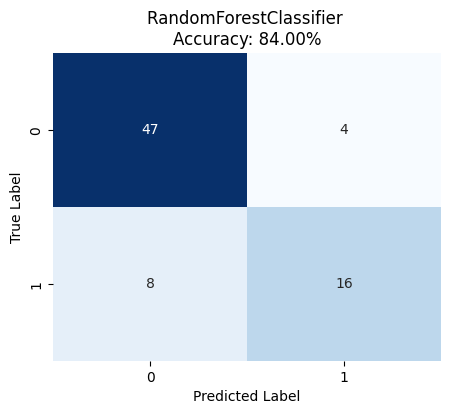

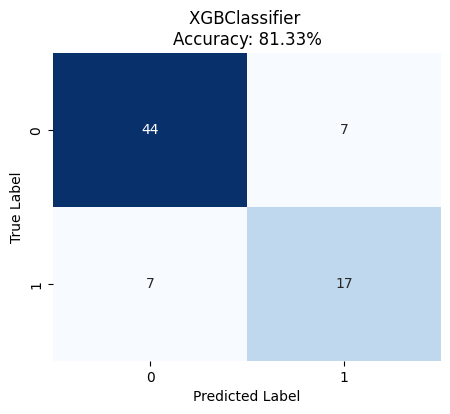

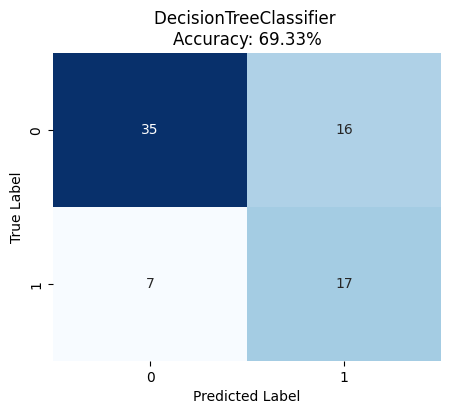

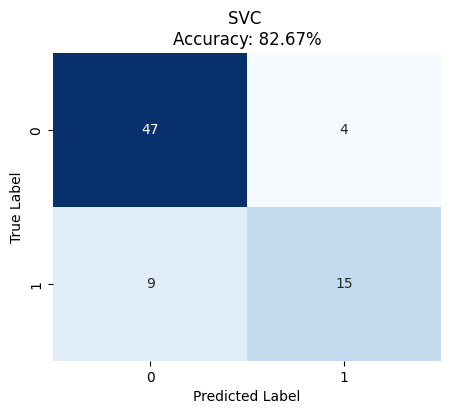

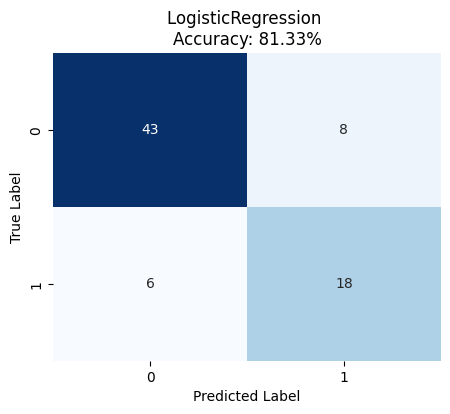

In [61]:

for res in top_5:

    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    # --- Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} \nAccuracy: {acc:.2%}")

    # # Save PNG
    # plt.tight_layout()
    # plt.savefig(f"confusion_matrix_{model_name}.png", dpi=300)
    # plt.show()  # show in notebook / console
    # plt.close()

# Shap XAI

In [62]:
import sklearn
sklearn.__version__

'1.6.1'

![image.png](attachment:image.png)

In [78]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),

}

In [79]:
parameters = {
     'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 7),
        'clf__class_weight': ['balanced'],
        'clf__penalty': ['l2', 'l1'],
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'DecisionTreeClassifier': {
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced'],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [10, 20, 50, 100],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced', 'balanced_subsample'],
        }
}

In [80]:
from imblearn.combine import SMOTEENN


In [94]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [96]:
x_without = x.drop(columns=['Sex','Diabetes','Anaemia'])
y = df['DeathEvent']

In [97]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_without, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [98]:

clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50,
    scale_pos_weight=3,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [99]:

print(f"Test Accuracy: {classification_report(y_test, clf.predict(x_test))}")



Test Accuracy:               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



In [100]:
results = []

for name, model in models.items():
    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    param_grid = parameters.get(name, {})

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_.named_steps['clf']
    feature_importance = None

    if hasattr(best_model, "feature_importances_"):  # For tree-based models
        feature_importance = pd.Series(
            best_model.feature_importances_,
            index=x_train.columns
        ).sort_values(ascending=False)

    elif hasattr(best_model, "coef_"):  # For linear models
        feature_importance = pd.Series(
            best_model.coef_[0],
            index=x_train.columns
        ).sort_values(ascending=False)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_,
        'feature_importance': feature_importance
    })

results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)

top_5 = results_sorted[:5]

if top_5[0]['feature_importance'] is not None:
    print("\nTop features for best model:")
    print(top_5[0]['feature_importance'])


Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........

Top features for best model:
PlateletCount              0.414596
FollowupDays               0.286201
SerumCreatinine            0.208742
EjectionFraction           0.090460
Age                        0.000000
HighBloodPressure          0.000000
CreatininePhosphokinase    0.000000
SerumSodium                0.000000
SmokingStatus              0.000000
dtype: float64


In [103]:

os.makedirs("saved_models", exist_ok=True)

results = []

for name, model in models.items():
    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    param_grid = parameters.get(name, {})

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_.named_steps['clf']
    feature_importance = None

    if hasattr(best_model, "feature_importances_"):
        feature_importance = pd.Series(
            best_model.feature_importances_,
            index=x_train.columns
        ).sort_values(ascending=False)

    elif hasattr(best_model, "coef_"):
        feature_importance = pd.Series(
            best_model.coef_[0],
            index=x_train.columns
        ).sort_values(ascending=False)

    # Save the entire pipeline (with scaler + model)
    model_path = f"saved_models/{name}_model.pkl"
    joblib.dump(grid.best_estimator_, model_path)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_,
        'feature_importance': feature_importance,
        'model_path': model_path
    })

# Sort results by best score
results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)
top_5 = results_sorted[:5]

Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........


In [101]:
for res in top_5:
    model_name = res['name']
    model = res['model']

    # Predict on test set
    y_pred = model.predict(x_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    class_report = classification_report(y_test, y_pred)

    # Get predicted scores for ROC AUC if possible
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(x_test)
    else:
        y_scores = None

    roc_auc = roc_auc_score(y_test, y_scores) if y_scores is not None else float('nan')

    # Print nicely formatted results
    print(f"\n{'='*10} Evaluation for model: {model_name} {'='*10}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}" if y_scores is not None else "ROC AUC    : N/A (no probability or decision function)")
    print("\nClassification Report:\n", class_report)
    print("#" * 80)


========== Evaluation for model: DecisionTreeClassifier ==========
Accuracy   : 0.9412
Recall     : 1.0000
F1 Score   : 0.9333
ROC AUC    : 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17

################################################################################

========== Evaluation for model: RandomForestClassifier ==========
Accuracy   : 0.8824
Recall     : 1.0000
F1 Score   : 0.8750
ROC AUC    : 0.9857

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      1.00      0.88         7

    accuracy                           0.88        17
   macro avg       0.89     

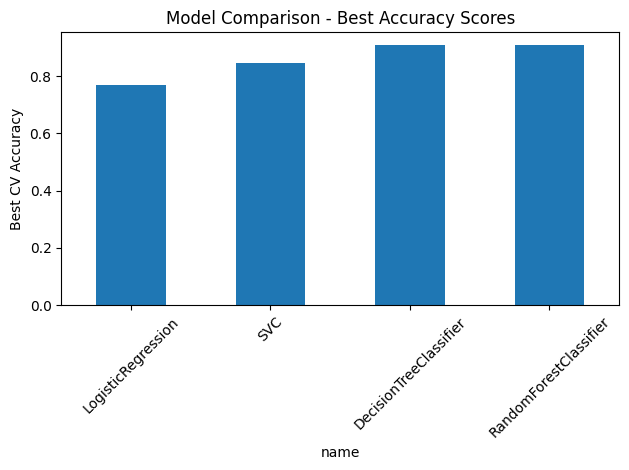

In [102]:
model_compare = pd.DataFrame(results)

model_compare.set_index('name', inplace=True)

model_compare['best_score'].plot.bar()

plt.ylabel('Best CV Accuracy')
plt.title('Model Comparison - Best Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

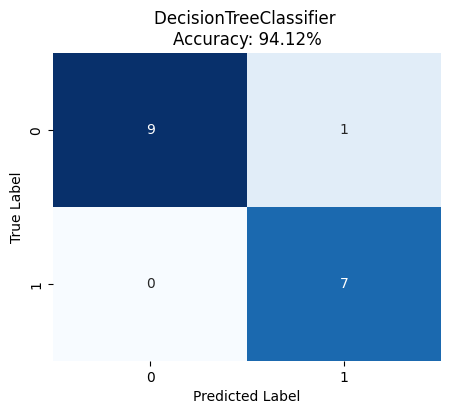

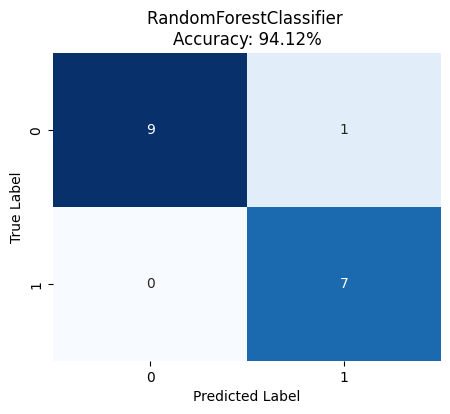

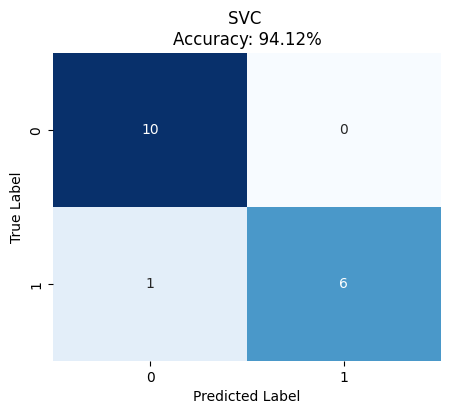

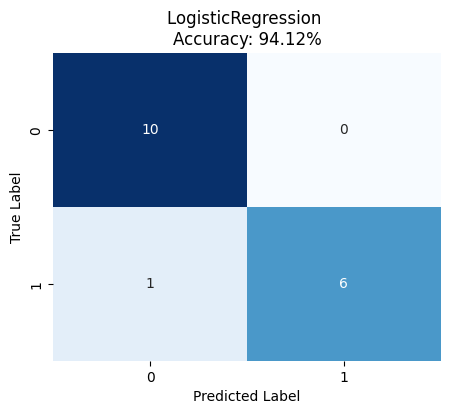

In [104]:
for res in top_5:

    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    # --- Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} \nAccuracy: {acc:.2%}")

    # # Save PNG
    # plt.tight_layout()
    # plt.savefig(f"confusion_matrix_{model_name}.png", dpi=300)
    # plt.show()  # show in notebook / console
    # plt.close()

# Save top 5 models
